#<center>Assignemnt-2</center>
## GMLFA-Autumn,2024
---

### This is the supporting Notbook for the given assignment. You will be provided with the instructions and code skeleton of the questions.

1. Please implement the codes on your own cosidering plagarism policy.
2. Write code for corresponding questions in their designated places.
3. Each group have to submit only one notebook (.ipynb) or python (.py) file.

## Group Informtion: To be filled by the candidates.

### Group Number: 11
### Members Roll Numbers: 20QM30001 and 20QM30004


# Dataset

QM9 Dataset:

The QM9 dataset is a widely used benchmark dataset in the field of graph neural networks (GNNs) and molecular property prediction. It contains about 134,000 small organic molecules with up to 9 heavy atoms (C, O, N, F). Each molecule is represented as a graph, where atoms are nodes and bonds are edges.

Key features of QM9:
- Number of graphs: ~134,000
- Node features: Atom properties (e.g., atomic number, charge)
- Edge features: Bond properties (e.g., bond type)
- Graph labels: Various molecular properties (e.g., energy, dipole moment)
	Available target properties:
0: mu, 1: alpha, 2: homo, 3: lumo, 4: gap, 5: r2, 6: zpve, 7: U0, 8: U, 9: H, 10: G, 11:Cv, 12: omega1

Link: https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.datasets.QM9.html

The dataset is used for regression tasks, predicting molecular properties from graph structures.

**Use Case:**
We are going to use 1000 graphs for training, 100 graphs for validation and 100 graphs for test.
We will use ‘0: mu (dipole moment)’, first property, as a label for the regression task.
You will get the Data-Loaded in the code notebook.
This is the Regression task so you have to take one label for every graph.


# Part-1:

References:
1. https://karateclub.readthedocs.io/en/latest/_modules/karateclub/node_embedding/neighbourhood/node2vec.html

2. https://karateclub.readthedocs.io/en/latest/_modules/karateclub/node_embedding/neighbourhood/deepwalk.html





In [1]:
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.8 MB/s eta 0:00:00


In [2]:
!pip install karateclub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 46.2 MB/s eta 0:00:00
  Created wheel for karateclub: filename=karateclub-1.3.3-py3-none-any.whl size=101980 sha256=857d640a5fa4595b2a84fe37a6d3b88add6bd68069d93a8a4eb0ea37d81bea28
  Stored in directory: /root/.cache/pip/wheels/62/bd/af/17e7ca6ba0ed144d22502780f5c0660a8e4985939dc6973a81
Successfully built karateclub
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      S

In [3]:
import torch
from torch_geometric.datasets import QM9
from torch_geometric.utils import to_networkx
import networkx as nx
from karateclub import DeepWalk, Node2Vec

# Load QM9 dataset
dataset = QM9(root='data/QM9')
dataset = dataset[:1200]  # First 1000 for training, 100 for validation, 100 for testing
data=dataset[0]
# Print general information about the dataset
print(f"Number of graphs in the dataset: {len(dataset)}")
print(f"Number of features per node: {data.x.shape[1]}")
print(f"Number of edge features: {data.edge_attr.shape[1]}")
print(f"Number of nodes in the first graph: {data.num_nodes}")
print(f"Number of edges in the first graph: {data.num_edges}")
print(f"Number of edge features in the first graph: {data.edge_attr.size()}")

# Investigate the node features
print("\nNode features:")
print(data.x)

# Investigate the edge features
print("\nEdge features:")
print(data.edge_attr)

# Investigate the adjacency list (edges)
print("\nEdges (connectivity):")
print(data.edge_index)

# Investigate the target properties (e.g., energy, dipole moment)
print("\nTarget properties:")
print(data.y)



Extracting data/QM9/raw/qm9_v3.zip
Processing...
Using a pre-processed version of the dataset. Please install 'rdkit' to alternatively process the raw data.
Done!


Number of graphs in the dataset: 1200
Number of features per node: 11
Number of edge features: 4
Number of nodes in the first graph: 5
Number of edges in the first graph: 8
Number of edge features in the first graph: torch.Size([8, 4])

Node features:
tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 4.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

Edge features:
tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]])

Edges (connectivity):
tensor([[0, 0, 0, 0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0, 0, 0, 0]])

Target properties:
tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1

In [4]:
train_dataset = dataset[:1000]
val_dataset = dataset[1000:1100]
test_dataset = dataset[1100:1200]


In [5]:
# Function to generate DeepWalk embeddings
def deepwalk_embedding(graph, dimensions=64, walk_length=10, num_walks=50):
    model = DeepWalk(dimensions=dimensions, walk_length=walk_length, walk_number=num_walks)
    model.fit(graph)
    # Return node embeddings directly from the model
    return model.get_embedding()  # This will return a dictionary with node embeddings

# Function to generate Node2Vec embeddings
def node2vec_embedding(graph, dimensions=64, walk_length=10, num_walks=50, p=1, q=0.5):
    model = Node2Vec(dimensions=dimensions, walk_length=walk_length, walk_number=num_walks, p=p, q=q)
    model.fit(graph)
    # Return node embeddings directly from the model
    return model.get_embedding()  # This will return a dictionary with node embeddings

In [6]:
# Convert PyG graph to NetworkX and generate embeddings
def convert_to_nx(pyg_graph):
    return to_networkx(pyg_graph, to_undirected=True)

In [7]:
# Function to compute graph-level features by averaging node embeddings
def get_graph_feature(graph, embedding_fn, dimensions=64, walk_length=10, num_walks=50, p=1, q=0.5):
    # Generate node embeddings using the specified embedding function
    if embedding_fn == 'deepwalk':
        node_embeddings = deepwalk_embedding(graph, dimensions=dimensions, walk_length=walk_length, num_walks=num_walks)
    elif embedding_fn == 'node2vec':
        node_embeddings = node2vec_embedding(graph, dimensions=dimensions, walk_length=walk_length, num_walks=num_walks, p=p, q=q)

    # Average the node embeddings to get a graph-level feature vector
    embeddings = []

    for node in graph.nodes():
        # Directly use the integer node index for accessing embeddings
        embeddings.append(node_embeddings[node])

    # Convert embeddings to NumPy array, then to PyTorch tensor
    embeddings_tensor = torch.tensor(np.array(embeddings), dtype=torch.float32)

    # Return the average node embeddings for the entire graph
    return embeddings_tensor.mean(dim=0)

In [8]:
import numpy as np

In [9]:
# Prepare graph embeddings for train, val, and test sets
X_train_dw = [get_graph_feature(convert_to_nx(graph), 'deepwalk') for graph in train_dataset]
X_val_dw = [get_graph_feature(convert_to_nx(graph), 'deepwalk') for graph in val_dataset]
X_test_dw = [get_graph_feature(convert_to_nx(graph), 'deepwalk') for graph in test_dataset]

In [10]:
X_train_n2v = [get_graph_feature(convert_to_nx(graph), 'node2vec') for graph in train_dataset]
X_val_n2v = [get_graph_feature(convert_to_nx(graph), 'node2vec') for graph in val_dataset]
X_test_n2v = [get_graph_feature(convert_to_nx(graph), 'node2vec') for graph in test_dataset]


In [11]:
# Target labels (dipole moment) - Extract the first property correctly
y_train = torch.tensor(np.array([data.y[:,0].numpy() for data in train_dataset]), dtype=torch.float)
y_val = torch.tensor(np.array([data.y[:,0].numpy() for data in val_dataset]), dtype=torch.float)
y_test = torch.tensor(np.array([data.y[:,0].numpy() for data in test_dataset]), dtype=torch.float)


In [12]:
y_training=y_train[:,0]
y_valid=y_val[:,0]
y_testing=y_test[:,0]

**NOW, I WILL BUILD THE DEEP NEURAL NETWORK FOR REGRESSION TASK**

In [13]:
import torch.nn as nn
import torch.optim as optim

In [14]:
# Deep Neural Network for regression
class GraphRegressor(nn.Module):
    def __init__(self, input_dim):
        super(GraphRegressor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8,1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [15]:
# Function to train and evaluate the model
def train_and_evaluate(X_train, y_train, X_test, y_test, input_dim):
    model = GraphRegressor(input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.002)
    num_epochs = 100

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(torch.stack(X_train))
        loss = criterion(outputs.flatten(), y_train)
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(torch.stack(X_test))
        test_loss = criterion(test_outputs.flatten(), y_test)
        rmse = torch.sqrt(test_loss).item()

    return rmse


In [16]:
# Using DeepWalk embedding
rmse_deepwalk = train_and_evaluate(X_train_dw, y_training, X_test_dw, y_testing, input_dim=64)


In [17]:
# Using Node2Vec embedding
rmse_node2vec = train_and_evaluate(X_train_n2v, y_training, X_test_n2v, y_testing, input_dim=64)

In [18]:
print("RMSE for DeepWalk:", rmse_deepwalk)
print("RMSE for Node2Vec:", rmse_node2vec)

RMSE for DeepWalk: 1.5642814636230469
RMSE for Node2Vec: 1.6531963348388672


# **Imp: For the part 2 and 3 you are not allowed to use any library implementation of the models.**

## You are free to change the structure of the code as per you understanding.

## You can write the training loop at once or for individual model, we don't mind untill you produce the required output.

#Part-2:

Here you to provide the custom implementation of Part-2, and then use that custom cretad layer to code the model.



In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.datasets import QM9
from torch_geometric.loader import DataLoader
from torch_geometric.utils import add_self_loops, degree
from torch_geometric.nn import MessagePassing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [20]:
# Load QM9 Dataset
dataset = QM9(root='data/QM9')
target_idx = 0

train_dataset = dataset[:1000]
val_dataset = dataset[1000:1100]
test_dataset = dataset[1100:1200]

In [21]:
def create_dataloader(dataset, batch_size=50, shuffle=True):
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

train_loader = create_dataloader(train_dataset)
val_loader = create_dataloader(val_dataset, shuffle=False)
test_loader = create_dataloader(test_dataset, shuffle=False)

In [22]:
# Implement a GCN Layer from scratch
class GCNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(GCNLayer, self).__init__(aggr='add')  # Aggregation function (sum)
        self.linear = nn.Linear(in_channels, out_channels)

    def forward(self, x, edge_index):
        # Step 1: Add self-loops to the adjacency matrix
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        # Step 2: Compute normalization
        row, col = edge_index
        deg = degree(row, x.size(0), dtype=x.dtype)  # Degree of nodes
        deg_inv_sqrt = deg.pow(-0.5)
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        # Step 3: Propagate messages
        return self.propagate(edge_index, x=x, norm=norm)

    def message(self, x_j, norm):
        # Step 4: Normalize node features
        return norm.view(-1, 1) * x_j

    def update(self, aggr_out):
        # Step 5: Apply linear transformation
        return self.linear(aggr_out)

In [23]:
# Custom pooling functions
def sum_pooling(x, batch):
    out = torch.zeros(batch.max().item() + 1, x.size(1), device=x.device)
    out.scatter_add_(0, batch.view(-1, 1).expand(-1, x.size(1)), x)
    return out

def mean_pooling(x, batch):
    out = sum_pooling(x, batch)
    count = torch.bincount(batch).view(-1, 1).to(x.device).float()
    return out / count

def max_pooling(x, batch):
    num_graphs = batch.max().item() + 1
    out = torch.full((num_graphs, x.size(1)), float('-inf'), device=x.device)

    for i in range(num_graphs):
        mask = (batch == i)
        if mask.any():
            out[i] = torch.max(x[mask], dim=0)[0]  # Use max operation along the node dimension

    return out


In [24]:
# Define the GCN Model for Regression
class GCN(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_layers, num_targets, pooling='sum'):
        super(GCN, self).__init__()
        self.layers = nn.ModuleList()

        # First layer
        self.layers.append(GCNLayer(num_node_features, hidden_channels))
        # Hidden layers
        for _ in range(num_layers - 1):
            self.layers.append(GCNLayer(hidden_channels, hidden_channels))

        # Pooling: Choose sum, mean, or max pooling
        if pooling == 'sum':
            self.pooling = sum_pooling
        elif pooling == 'mean':
            self.pooling = mean_pooling
        elif pooling == 'max':
            self.pooling = max_pooling


        # Final layer for regression
        self.fc = nn.Linear(hidden_channels, num_targets)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        # Pass through GCN layers
        for layer in self.layers:
            x = layer(x, edge_index)

        # Pooling (graph-level)
        x = self.pooling(x, batch)

        # Final regression layer
        return self.fc(x).squeeze()


In [25]:
# Train and Evaluation Functions
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for data in loader:
        optimizer.zero_grad()
        output = model(data)
        target = data.y[:, target_idx].squeeze()  # Regression target
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(loader.dataset)

In [26]:
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0
    preds = []
    targets = []
    with torch.no_grad():
        for data in loader:
            output = model(data)
            target = data.y[:, target_idx].squeeze()
            loss = criterion(output, target)
            total_loss += loss.item() * data.num_graphs
            preds.append(output.cpu().numpy())
            targets.append(target.cpu().numpy())
    preds = np.concatenate(preds, axis=0)
    targets = np.concatenate(targets, axis=0)
    rmse = np.sqrt(mean_squared_error(targets, preds))
    return total_loss / len(loader.dataset), rmse

In [27]:
# Main Loop to Train GCN
def run_experiment(pooling_method, num_layers_list, num_epochs=150):
    results = {}
    for num_layers in num_layers_list:
        print(f'\nTraining GCN with {num_layers} layers and "{pooling_method}" pooling')

        model = GCN(dataset.num_features, hidden_channels=128, num_layers=num_layers, num_targets=1, pooling=pooling_method)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
        criterion = nn.MSELoss()

        train_losses = []
        val_losses = []
        val_rmses = []
        for epoch in range(1, num_epochs + 1):
            train_loss = train(model, train_loader, optimizer, criterion)
            val_loss, val_rmse = evaluate(model, val_loader, criterion)
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            val_rmses.append(val_rmse)
            print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val RMSE: {val_rmse:.4f}')

        # Test model after training
        test_loss, test_rmse = evaluate(model, test_loader, criterion)
        print(f'Test RMSE for {num_layers} layers and "{pooling_method}" pooling: {test_rmse:.4f}')
        results[num_layers] = {'train_losses': train_losses, 'val_losses': val_losses, 'val_rmses': val_rmses, 'test_rmse': test_rmse}

    return results


In [28]:
# Run Experiments with Sum, Mean, and Max Pooling
# Also vary the number of GCN layers from 2 to 4
num_layers_list = [2, 3, 4]

In [29]:
results_sum = run_experiment(pooling_method='sum', num_layers_list=num_layers_list)


Training GCN with 2 layers and "sum" pooling
Epoch 1, Train Loss: 27.2011, Val Loss: 3.6479, Val RMSE: 1.9099
Epoch 2, Train Loss: 4.0374, Val Loss: 2.0165, Val RMSE: 1.4200
Epoch 3, Train Loss: 2.1163, Val Loss: 1.8613, Val RMSE: 1.3643
Epoch 4, Train Loss: 1.8984, Val Loss: 1.8705, Val RMSE: 1.3677
Epoch 5, Train Loss: 1.8820, Val Loss: 1.8431, Val RMSE: 1.3576
Epoch 6, Train Loss: 1.9351, Val Loss: 2.1695, Val RMSE: 1.4729
Epoch 7, Train Loss: 1.8762, Val Loss: 1.8806, Val RMSE: 1.3714
Epoch 8, Train Loss: 1.9217, Val Loss: 1.8610, Val RMSE: 1.3642
Epoch 9, Train Loss: 1.9121, Val Loss: 1.7903, Val RMSE: 1.3380
Epoch 10, Train Loss: 1.9550, Val Loss: 2.2707, Val RMSE: 1.5069
Epoch 11, Train Loss: 2.0219, Val Loss: 1.7707, Val RMSE: 1.3307
Epoch 12, Train Loss: 1.8681, Val Loss: 2.0155, Val RMSE: 1.4197
Epoch 13, Train Loss: 1.9042, Val Loss: 1.7792, Val RMSE: 1.3339
Epoch 14, Train Loss: 1.9216, Val Loss: 1.9988, Val RMSE: 1.4138
Epoch 15, Train Loss: 1.9672, Val Loss: 1.8831, Val 

In [30]:
results_mean = run_experiment(pooling_method='mean', num_layers_list=num_layers_list)



Training GCN with 2 layers and "mean" pooling
Epoch 1, Train Loss: 2.6995, Val Loss: 2.2776, Val RMSE: 1.5092
Epoch 2, Train Loss: 1.9503, Val Loss: 2.1728, Val RMSE: 1.4740
Epoch 3, Train Loss: 1.9072, Val Loss: 2.2656, Val RMSE: 1.5052
Epoch 4, Train Loss: 1.9016, Val Loss: 2.0951, Val RMSE: 1.4474
Epoch 5, Train Loss: 1.8946, Val Loss: 2.1271, Val RMSE: 1.4585
Epoch 6, Train Loss: 1.8729, Val Loss: 2.1382, Val RMSE: 1.4623
Epoch 7, Train Loss: 1.9159, Val Loss: 2.1613, Val RMSE: 1.4701
Epoch 8, Train Loss: 2.0173, Val Loss: 1.9484, Val RMSE: 1.3958
Epoch 9, Train Loss: 1.9491, Val Loss: 2.1971, Val RMSE: 1.4823
Epoch 10, Train Loss: 1.9103, Val Loss: 2.1775, Val RMSE: 1.4756
Epoch 11, Train Loss: 1.8797, Val Loss: 2.0701, Val RMSE: 1.4388
Epoch 12, Train Loss: 1.9040, Val Loss: 2.0223, Val RMSE: 1.4221
Epoch 13, Train Loss: 1.8977, Val Loss: 2.3434, Val RMSE: 1.5308
Epoch 14, Train Loss: 1.9052, Val Loss: 2.5331, Val RMSE: 1.5916
Epoch 15, Train Loss: 1.9148, Val Loss: 2.3339, Val 

In [31]:
results_max = run_experiment(pooling_method='max', num_layers_list=num_layers_list)



Training GCN with 2 layers and "max" pooling
Epoch 1, Train Loss: 2.3738, Val Loss: 2.0686, Val RMSE: 1.4383
Epoch 2, Train Loss: 1.7479, Val Loss: 1.9785, Val RMSE: 1.4066
Epoch 3, Train Loss: 1.5754, Val Loss: 2.0301, Val RMSE: 1.4248
Epoch 4, Train Loss: 1.4867, Val Loss: 1.9386, Val RMSE: 1.3923
Epoch 5, Train Loss: 1.4378, Val Loss: 1.7953, Val RMSE: 1.3399
Epoch 6, Train Loss: 1.3932, Val Loss: 1.9500, Val RMSE: 1.3964
Epoch 7, Train Loss: 1.3637, Val Loss: 1.9718, Val RMSE: 1.4042
Epoch 8, Train Loss: 1.3196, Val Loss: 1.8378, Val RMSE: 1.3557
Epoch 9, Train Loss: 1.3090, Val Loss: 1.8458, Val RMSE: 1.3586
Epoch 10, Train Loss: 1.3011, Val Loss: 1.8692, Val RMSE: 1.3672
Epoch 11, Train Loss: 1.2769, Val Loss: 1.9012, Val RMSE: 1.3788
Epoch 12, Train Loss: 1.2839, Val Loss: 1.7993, Val RMSE: 1.3414
Epoch 13, Train Loss: 1.2619, Val Loss: 1.8092, Val RMSE: 1.3451
Epoch 14, Train Loss: 1.2912, Val Loss: 1.7800, Val RMSE: 1.3342
Epoch 15, Train Loss: 1.2437, Val Loss: 1.8236, Val R

In [32]:
# Plotting Results
def plot_results(results, pooling_method):
    for num_layers, data in results.items():
        plt.figure(figsize=(10, 6))
        plt.plot(data['train_losses'], label='Train Loss')
        plt.plot(data['val_losses'], label='Validation Loss')
        plt.title(f'Loss vs Epochs ({num_layers} Layers, {pooling_method.capitalize()} Pooling)')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

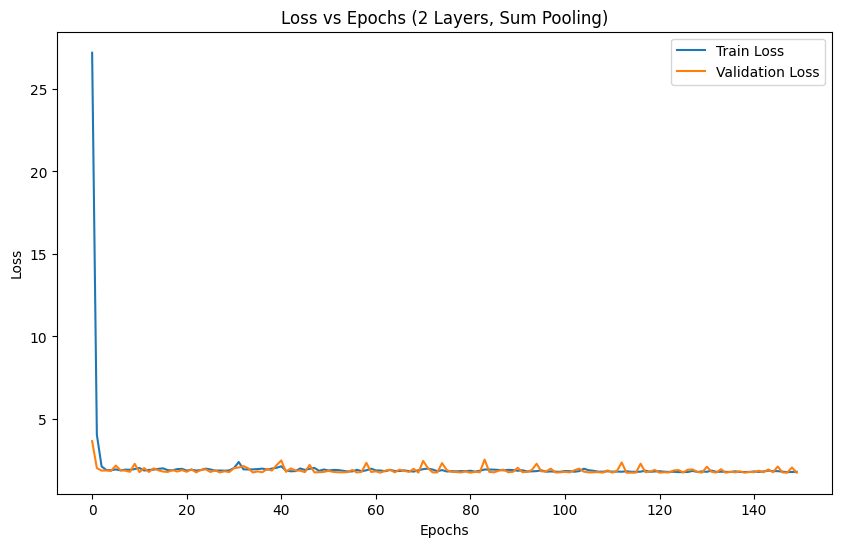

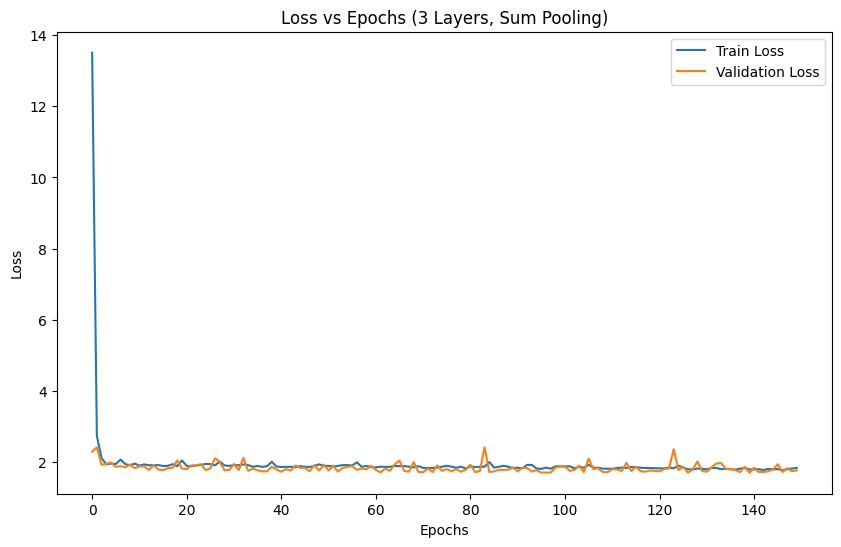

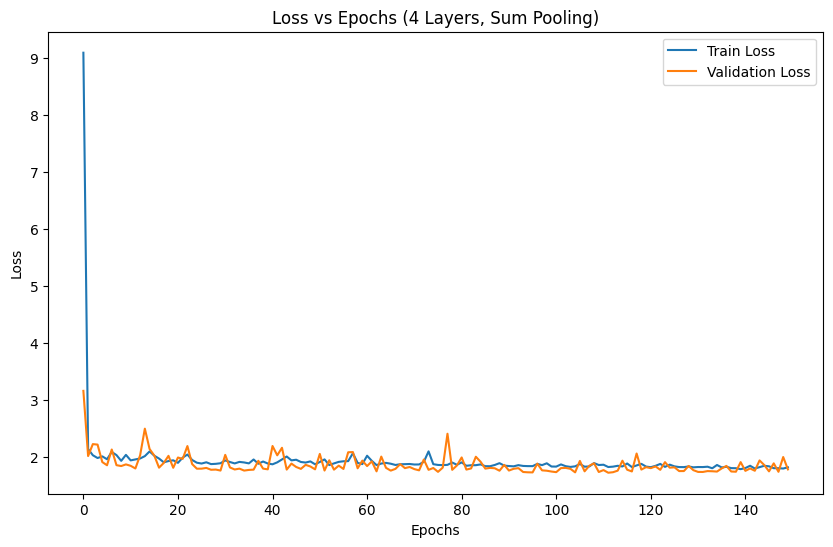

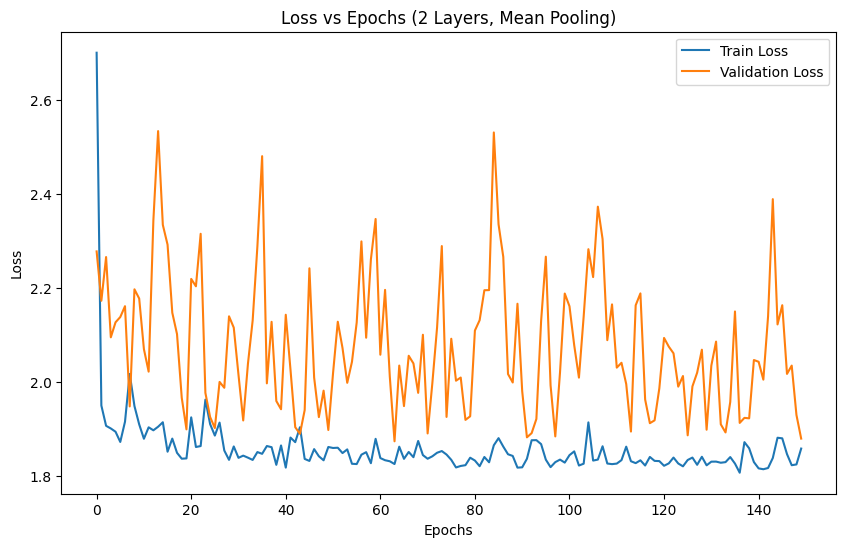

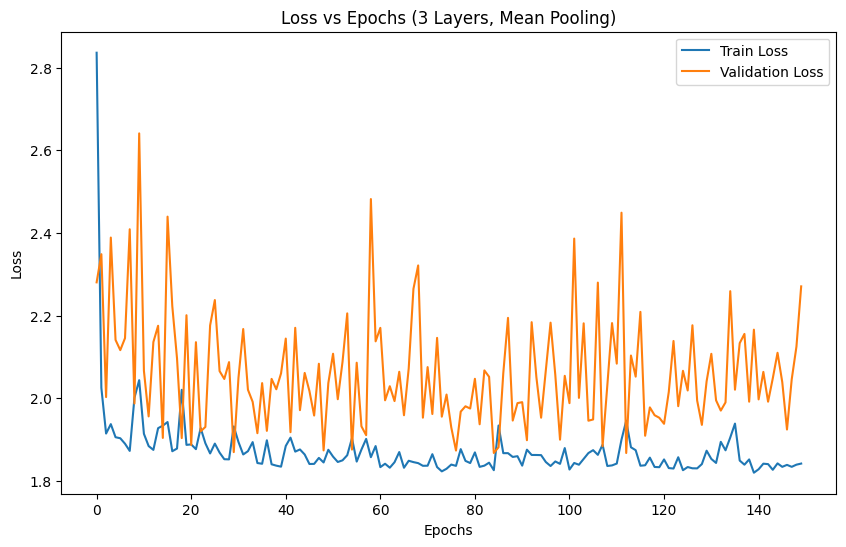

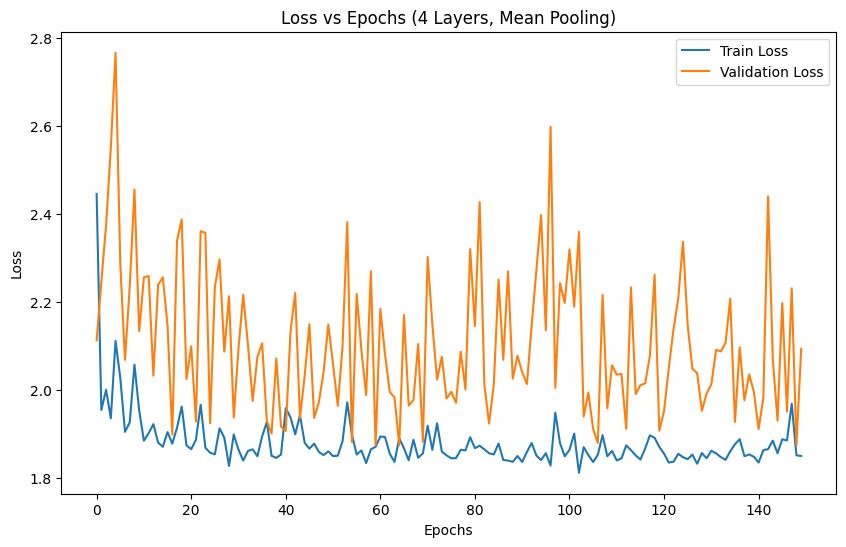

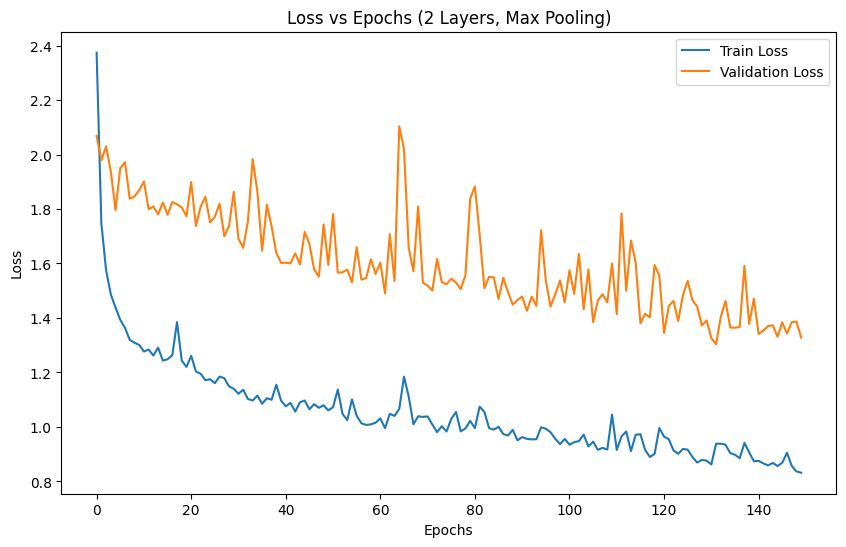

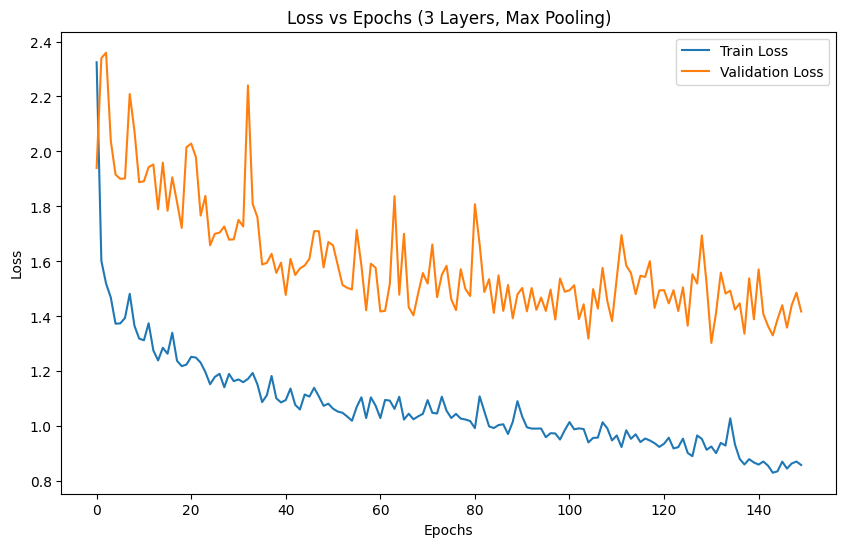

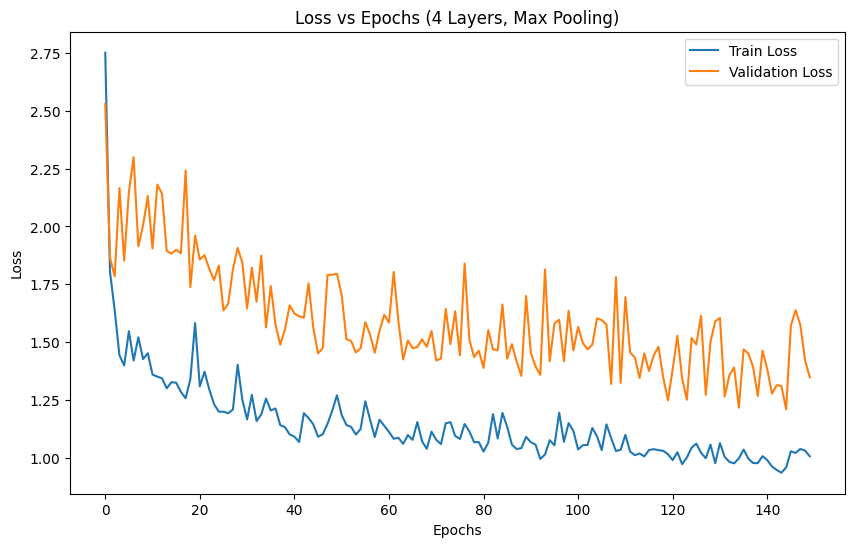

In [33]:
plot_results(results_sum, 'sum')
plot_results(results_mean, 'mean')
plot_results(results_max, 'max')

#Part-3:

Here you to provide the custom implementation of Part-3, and then use that custom cretad layer to code the model.

In [34]:
from torch_geometric.nn import global_mean_pool

In [35]:
class EGATConv(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim, heads=1):
        super(EGATConv, self).__init__(aggr='add', node_dim=0)
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.heads = heads
        self.edge_dim = edge_dim

        self.lin = nn.Linear(in_channels, heads * out_channels, bias=False)
        self.att = nn.Linear(2 * out_channels + edge_dim, heads)

        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.lin.weight)
        nn.init.xavier_uniform_(self.att.weight)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x).view(-1, self.heads, self.out_channels)

        # Add self-loops to the adjacency matrix
        edge_index, edge_attr = add_self_loops(edge_index, edge_attr, num_nodes=x.size(0))

        # Propagate messages
        out = self.propagate(edge_index, x=x, edge_attr=edge_attr)

        return out.mean(dim=1)  # Average attention heads

    def message(self, x_i, x_j, edge_attr, index, ptr, size_i):
        x_j = x_j.view(-1, self.heads * self.out_channels)
        x_i = x_i.view(-1, self.heads * self.out_channels)

        alpha = torch.cat([x_i, x_j, edge_attr], dim=-1)
        alpha = self.att(alpha).view(-1, self.heads, 1)
        alpha = F.leaky_relu(alpha)

        alpha = F.softmax(alpha, dim=0)

        return x_j.view(-1, self.heads, self.out_channels) * alpha

    def update(self, aggr_out):
        return aggr_out

class EGATModel(nn.Module):
    def __init__(self, num_node_features, num_edge_features, num_classes, hidden_channels=64):
        super(EGATModel, self).__init__()
        self.conv1 = EGATConv(num_node_features, hidden_channels, num_edge_features)
        self.conv2 = EGATConv(hidden_channels, hidden_channels, num_edge_features)
        self.conv3 = EGATConv(hidden_channels, hidden_channels, num_edge_features)
        self.conv4 = EGATConv(hidden_channels, hidden_channels, num_edge_features)
        self.lin = nn.Linear(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index, edge_attr, batch = data.x, data.edge_index, data.edge_attr, data.batch

        x = F.relu(self.conv1(x, edge_index, edge_attr))
        x = F.relu(self.conv2(x, edge_index, edge_attr))
        x = F.relu(self.conv3(x, edge_index, edge_attr))
        x = F.relu(self.conv4(x, edge_index, edge_attr))

        # Global mean pooling
        x = global_mean_pool(x, batch)

        # Final prediction
        x = self.lin(x)

        return x

# write training loop

In [36]:
# code here# Training function
def train(model, loader, optimizer, device):
    model.train()
    total_loss = 0
    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = F.mse_loss(out, data.y[:, 0].unsqueeze(1))  # Using the first property (mu) as target
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(loader.dataset)

# Evaluation function
def evaluate(model, loader, device):
    model.eval()
    total_loss = 0
    predictions = []
    targets = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)
            total_loss += F.mse_loss(out, data.y[:, 0].unsqueeze(1)).item() * data.num_graphs
            predictions.extend(out.cpu().numpy())
            targets.extend(data.y[:, 0].cpu().numpy())
    rmse = np.sqrt(mean_squared_error(targets, predictions))
    return total_loss / len(loader.dataset), rmse

# Main training loop
def main():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Initialize the model
    model = EGATModel(num_node_features=dataset.num_node_features,
                      num_edge_features=dataset.num_edge_features,
                      num_classes=1).to(device)  # 1 for regression

    # Define optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, optimizer, device)
        val_loss, val_rmse = evaluate(model, val_loader, device)
        print(f'Epoch {epoch+1:03d}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val RMSE: {val_rmse:.4f}')

    # Final evaluation on test set
    test_loss, test_rmse = evaluate(model, test_loader, device)
    print(f'Test Loss: {test_loss:.4f}, Test RMSE: {test_rmse:.4f}')

if __name__ == "__main__":
    main()

Epoch 001, Train Loss: 6.7879, Val Loss: 8.2917, Val RMSE: 2.8795
Epoch 002, Train Loss: 6.7020, Val Loss: 8.1952, Val RMSE: 2.8627
Epoch 003, Train Loss: 6.6176, Val Loss: 8.0996, Val RMSE: 2.8460
Epoch 004, Train Loss: 6.5348, Val Loss: 8.0049, Val RMSE: 2.8293
Epoch 005, Train Loss: 6.4520, Val Loss: 7.9128, Val RMSE: 2.8130
Epoch 006, Train Loss: 6.3721, Val Loss: 7.8203, Val RMSE: 2.7965
Epoch 007, Train Loss: 6.2920, Val Loss: 7.7299, Val RMSE: 2.7803
Epoch 008, Train Loss: 6.2135, Val Loss: 7.6408, Val RMSE: 2.7642
Epoch 009, Train Loss: 6.1361, Val Loss: 7.5528, Val RMSE: 2.7482
Epoch 010, Train Loss: 6.0591, Val Loss: 7.4671, Val RMSE: 2.7326
Epoch 011, Train Loss: 5.9849, Val Loss: 7.3802, Val RMSE: 2.7167
Epoch 012, Train Loss: 5.9099, Val Loss: 7.2963, Val RMSE: 2.7012
Epoch 013, Train Loss: 5.8373, Val Loss: 7.2123, Val RMSE: 2.6856
Epoch 014, Train Loss: 5.7657, Val Loss: 7.1286, Val RMSE: 2.6699
Epoch 015, Train Loss: 5.6939, Val Loss: 7.0479, Val RMSE: 2.6548
Epoch 016,